# **Step 1:  Import necessary libraries**

In [63]:
# -------------------------------
# 1. Import necessary libraries
# -------------------------------
# Import necessary libraries
import pandas as pd              # For data manipulation
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs

# Import scikit-learn modules for model training and evaluation
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import LabelEncoder         # For encoding categorical variables
from sklearn.ensemble import RandomForestClassifier      # Our chosen model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Enable inline plotting
%matplotlib inline

# **Step 2: Load and Explore the Dataset**

In [64]:
# -------------------------------
# 2. Load and Explore the Dataset
# -------------------------------

# Read the dataset (ensure the file is in your Colab environment)
data = pd.read_csv('Autism Behaviour Dataset.csv')

# Let's look at the first few rows
print("First 5 rows of the raw dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

First 5 rows of the raw dataset:
   Child ID  Age  Gender Current Mood  Parent Satisfaction  Engagement Level  \
0         1   10  Female        Happy                    4                 5   
1         2    7  Female        Happy                    5                 4   
2         3    9  Female        Happy                    5                 4   
3         4    7  Female        Happy                    5                 4   
4         5   10  Female        Happy                    5                 5   

   Completed Tasks  Time Spent  Correct in First Attempt      Level  
0                9        94.1                         6  Very High  
1                8        85.5                         7       High  
2                8        77.1                         7       High  
3                8        79.6                         4       High  
4                9        98.3                         7  Very High  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8

# **Step 3: Check for Missing Values**

In [65]:
# =========================================
# 3. Check for Missing Values
# =========================================
print("\nChecking for missing values:")
print(data.isnull().sum())

# (Optional) handle missing values if needed
# data.dropna(inplace=True)
# or data.fillna(method='ffill', inplace=True)


Checking for missing values:
Child ID                    0
Age                         0
Gender                      0
Current Mood                0
Parent Satisfaction         0
Engagement Level            0
Completed Tasks             0
Time Spent                  0
Correct in First Attempt    0
Level                       0
dtype: int64


# **Step 4: Identify Categorical vs. Numeric Columns**

In [66]:
# =========================================
# 4. Identify Categorical vs. Numeric Columns
# =========================================
# Based on your output, these columns have string categories:
categorical_cols = ["Gender", "Current Mood", "Level"]

# The following are already numeric (int or float):
# "Child ID", "Age", "Parent Satisfaction", "Engagement Level",
# "Completed Tasks", "Time Spent", "Correct in First Attempt"
# We'll treat them as numeric.

# **Step 5: Split the Data into Training and Testing Sets**

In [67]:
# -------------------------------
# 5. Split the Data into Training and Testing Sets
# -------------------------------
# We'll use 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 6: Label Encode the Categorical Columns**

In [68]:
# =========================================
# 6. Label Encode the Categorical Columns
# =========================================
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    encoders[col] = le

print("\nData after Label Encoding (preview):")
print(data.head())


Data after Label Encoding (preview):
   Child ID  Age  Gender  Current Mood  Parent Satisfaction  Engagement Level  \
0         1   10       0             2                    4                 5   
1         2    7       0             2                    5                 4   
2         3    9       0             2                    5                 4   
3         4    7       0             2                    5                 4   
4         5   10       0             2                    5                 5   

   Completed Tasks  Time Spent  Correct in First Attempt  Level  
0                9        94.1                         6      3  
1                8        85.5                         7      0  
2                8        77.1                         7      0  
3                8        79.6                         4      0  
4                9        98.3                         7      3  


# **Step 7: Define Features (X) and Target (y)**

In [69]:
# =========================================
# 7. Define Features (X) and Target (y)
# =========================================
# We want to predict "Level", so exclude it from features.
# Also, "Child ID" is usually just an identifier, so we skip it.
feature_cols = [
    "Age",
    "Gender",
    "Current Mood",
    "Parent Satisfaction",
    "Engagement Level",
    "Completed Tasks",
    "Time Spent",
    "Correct in First Attempt"
]
target_col = "Level"

X = data[feature_cols]
y = data[target_col]

# **Step 8: Split Data into Training and Test Sets**

In [70]:
# =========================================
# 8. Split Data into Training and Test Sets
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)



Training set size: (640, 8)
Test set size: (160, 8)


# **Step 9: Train a Random Forest Classifier**

In [71]:
# =========================================
# 9. Train a Random Forest Classifier
# =========================================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Step 10: Evaluate the Model on the Test Set**


Model Accuracy on Test Set: 96.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.94      0.92      0.93        37
           2       0.94      0.97      0.95        30
           3       0.93      1.00      0.97        14
           4       1.00      0.97      0.98        67

    accuracy                           0.96       160
   macro avg       0.95      0.97      0.96       160
weighted avg       0.96      0.96      0.96       160



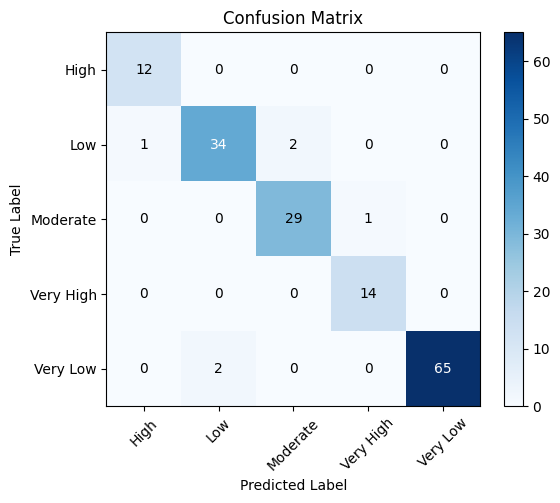

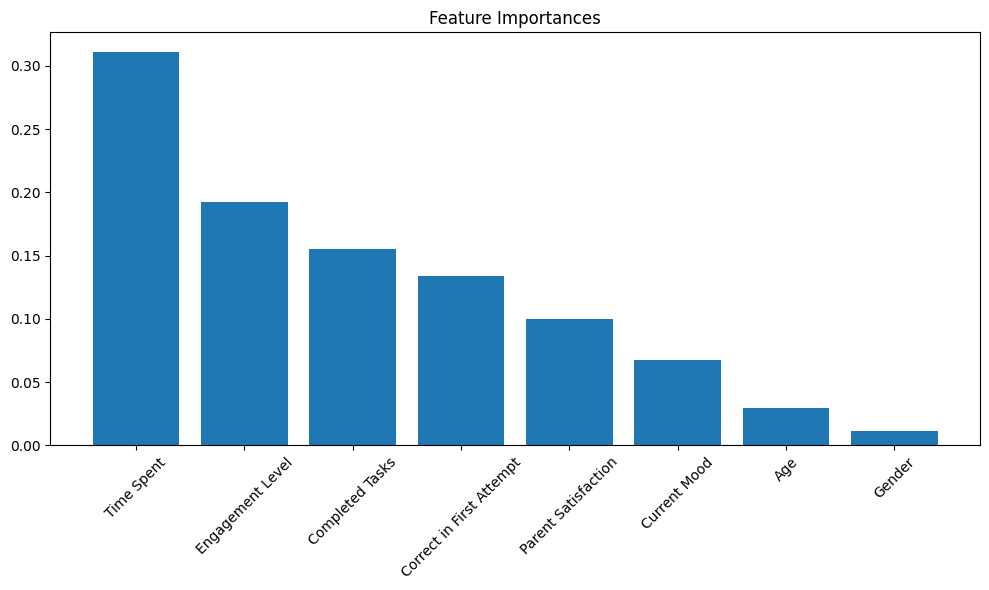

In [73]:
# =========================================
# 10. Evaluate the Model on the Test Set
# =========================================
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy on Test Set: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------------------
# 10A. Confusion Matrix
# -----------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# If you want readable labels on axes, decode the numeric labels from the "Level" encoder:
level_classes = encoders["Level"].classes_  # e.g. ['High', 'Low', 'Moderate', 'Very High', 'Very Low']
tick_marks = np.arange(len(level_classes))
plt.xticks(tick_marks, level_classes, rotation=45)
plt.yticks(tick_marks, level_classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Annotate counts
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# -----------------------------------------
# 10B. Feature Importances
# -----------------------------------------
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_cols)), importances[indices], align="center")
plt.xticks(range(len(feature_cols)), [feature_cols[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# **Step 11: Predict on a Sample Row in String Format**

In [74]:
# =========================================
# 11. Predict on a Sample Row in String Format
# =========================================
# Suppose we have a new data point (excluding 'Level' since that's what we predict).
# We'll create it with the original string categories for "Gender" and "Current Mood".
sample_row = pd.DataFrame({
    "Age": [10],
    "Gender": ["Female"],            # original string
    "Current Mood": ["Happy"],       # original string
    "Parent Satisfaction": [4],      # numeric
    "Engagement Level": [5],         # numeric
    "Completed Tasks": [9],
    "Time Spent": [94.1],
    "Correct in First Attempt": [6]
})

print("\nSample row in original string format:")
print(sample_row)

# -----------------------------------------
# 11A. Encode the Sample Row
# -----------------------------------------
# We must transform each categorical column with the SAME encoders used during training.
encoded_sample = sample_row.copy()

for col in ["Gender", "Current Mood"]:
    encoded_sample[col] = encoders[col].transform(encoded_sample[col].astype(str))

print("\nEncoded sample row (numeric form):")
print(encoded_sample)

# -----------------------------------------
# 11B. Predict with the Trained Model
# -----------------------------------------
sample_prediction_numeric = model.predict(encoded_sample)[0]
print("\nRaw numeric prediction for 'Level':", sample_prediction_numeric)

# -----------------------------------------
# 11C. Decode the Predicted 'Level' Back to String
# -----------------------------------------
decoded_prediction = encoders["Level"].inverse_transform([sample_prediction_numeric])[0]
print("Decoded string prediction for 'Level':", decoded_prediction)

# -----------------------------------------
# 11D. Display Final Result
# -----------------------------------------
sample_row["Predicted Level"] = decoded_prediction
print("\nFinal sample row with predicted 'Level':")
print(sample_row)



Sample row in original string format:
   Age  Gender Current Mood  Parent Satisfaction  Engagement Level  \
0   10  Female        Happy                    4                 5   

   Completed Tasks  Time Spent  Correct in First Attempt  
0                9        94.1                         6  

Encoded sample row (numeric form):
   Age  Gender  Current Mood  Parent Satisfaction  Engagement Level  \
0   10       0             2                    4                 5   

   Completed Tasks  Time Spent  Correct in First Attempt  
0                9        94.1                         6  

Raw numeric prediction for 'Level': 3
Decoded string prediction for 'Level': Very High

Final sample row with predicted 'Level':
   Age  Gender Current Mood  Parent Satisfaction  Engagement Level  \
0   10  Female        Happy                    4                 5   

   Completed Tasks  Time Spent  Correct in First Attempt Predicted Level  
0                9        94.1                         6   

# **Step 12: Save and Download the Trained Model**

In [75]:
# -----------------------------------------
# 12. Save and Download the Trained Model
# -----------------------------------------
import joblib
from google.colab import files

# Save the trained model to a file named 'autism_behavior_model.pkl'
joblib.dump(model, 'autism_behavior_model.pkl')
print("Model saved to autism_behavior_model.pkl")

# Download the model file
files.download('autism_behavior_model.pkl')


Model saved to autism_behavior_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>